# Name: Sajid Gul
# Registration No: s24pwmcs0194

# Introduction

# Predicting the likelihood of health risks, such as diabetes, using medical data

# Project Overview:
This project aims to predict the chances of diabetes in individuals based on their medical characteristics using the Pima Indians Diabetes Database. Early prediction of diabetes can lead to timely treatment and management, reducing complications and improving patient outcomes.

# Objective:
The main objective is to develop a predictive model that can classify individuals as diabetic or non- diabetic based on their medical attributes. This involves understanding the dataset, preparing the data, training a machine learning model, and testing it.

# Significance:
Diabetes is a major health risk that can lead to serious complications if not managed properly. By predicting diabetes early, healthcare providers can take preventive measures to improve patient health.

# Methodology: We will be using CRISP methodology
# • Business Understanding
o Objective: Develop a predictive model for diabetes diagnosis based on medical attributes.
o Context: The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases, focusing on diagnosing diabetes in females of Pima Indian heritage.
# • Data Understanding
o Data Collection: Utilize the Pima Indians Diabetes Database from Kaggle.
o Initial Data Exploration: Conduct EDA to understand the dataset's structure, contents, and patterns.
# • Data Preparation
o Data Cleaning: Address missing values and outliers.
o Data Transformation: Convert categorical variables and standardize numerical features.
o Data Integration: Combine data from multiple sources if necessary.
# • Modeling
o Model Selection: Choose suitable machine learning models (e.g., Logistic Regression, Decision Tree). o Model Training: Train the selected models using the prepared dataset.
# • Evaluation
o Model Assessment: Evaluate model performance using metrics such as accuracy, precision, recall, and F1 score.
o Model Improvement: Refine models based on evaluation results to improve performance.
# • Deployment
o Deliverables: Provide a cleaned dataset, trained model, evaluation metrics, comprehensive report, and project presentation.
o Implementation: Plan the deployment of the predictive model using web Flask API and pass data through endpoint to predict the result.

### Model Training
Five machine learning models were trained: Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN). Hyperparameter tuning was performed using GridSearchCV to optimize the models.

### Evaluation Metrics
The models were evaluated using accuracy, precision, recall, F1 score, and Root Mean Squared Error (RMSE). Cross-validation was also performed to ensure the robustness of the models.

### Insights
The Random Forest model performed the best in terms of accuracy and F1 score.

## Model Deployment

### Deployment Method
The Random Forest model was deployed as a web API using Flask. The API allows users to send input data and receive diabetes predictions.

### Implementation and Testing
The deployment process involved setting up a Flask application, defining the `/predict` endpoint, and loading the trained model. The API was tested using sample input data.

### Usage Instructions
To use the deployed model, send a POST request to `http://127.0.0.1:5000/predict` with the following JSON format:

```json
{
    "Pregnancies": 1,
    "Glucose": 85,
    "BloodPressure": 66,
    "SkinThickness": 29,
    "Insulin": 0,
    "BMI": 26.6,
    "DiabetesPedigreeFunction": 0.351,
    "Age": 31
}

# output:
{
    "prediction": 1
}

In [4]:
import pandas as pd

In [4]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the diabetes dataset
df = pd.read_csv('dataset/diabetes.csv')

# display first few row
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Handle missing values
cols_with_missing_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_missing_values] = df[cols_with_missing_values].replace(0, pd.NA)
df.fillna(df.mean(), inplace=True)

# Check for missing values
df.isnull().sum()
# Check for missing values
print("Missing values count after handling:")
print(df.isnull().sum())

Missing values count after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


/var/folders/h2/84st6gxj7vs7npmnq3ylnhg00000gn/T/ipykernel_15269/3571035235.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


In [6]:
# Check for duplicates and remove them...
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


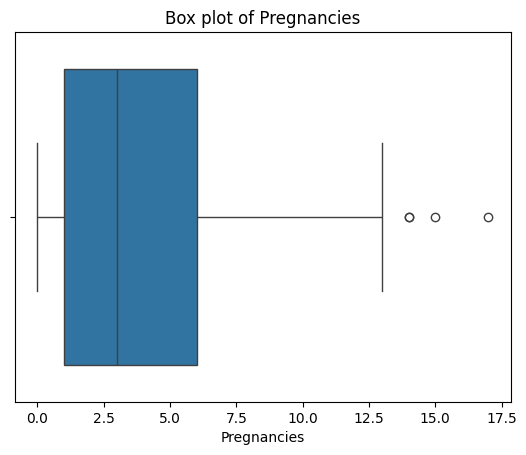

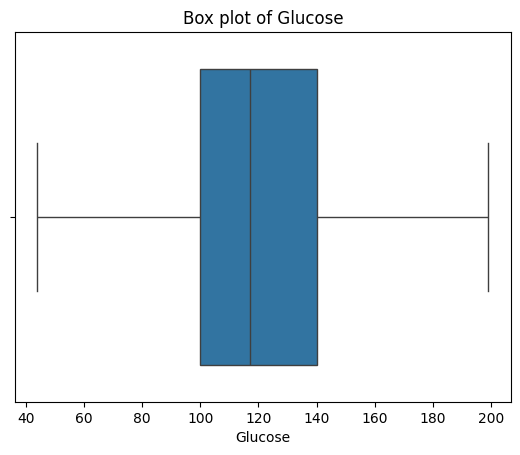

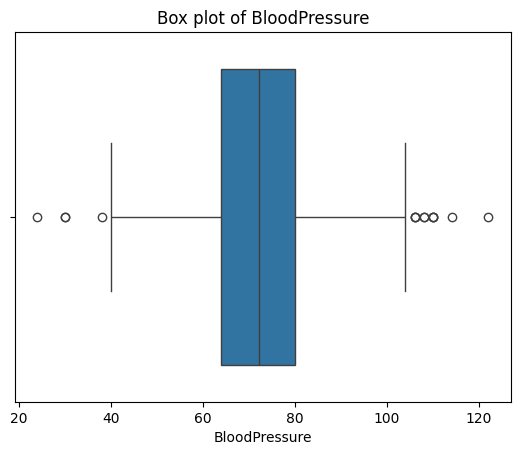

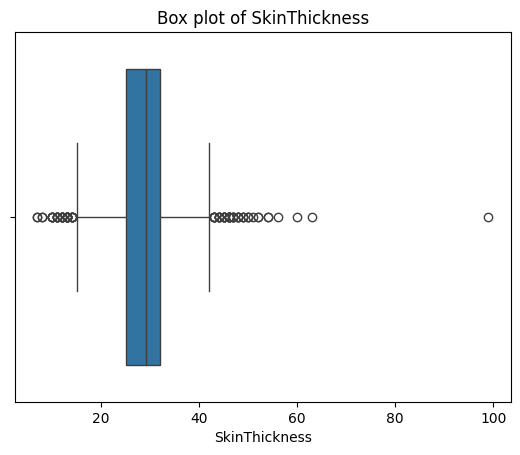

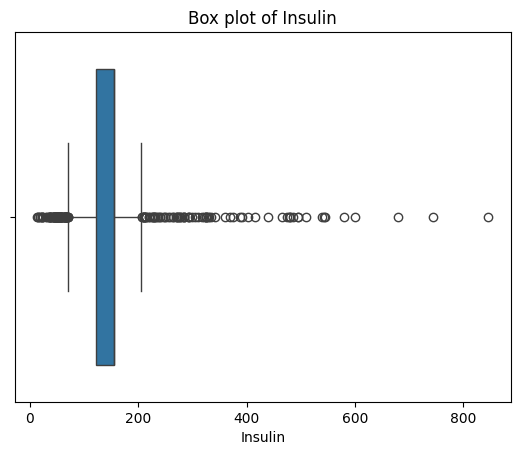

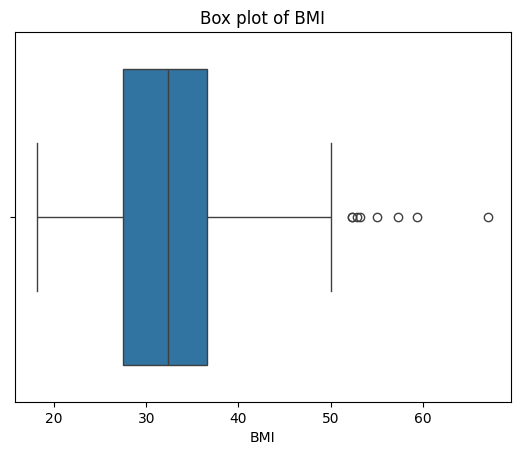

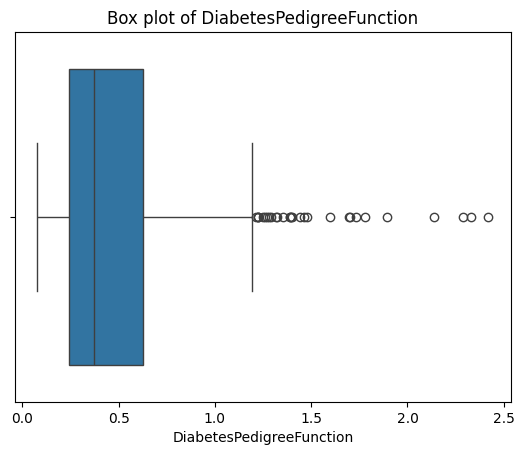

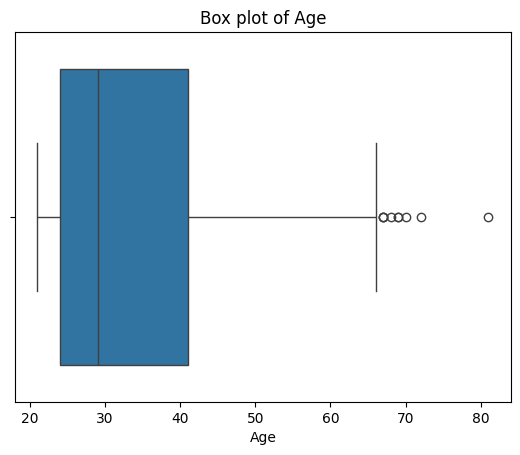

In [7]:
# Visualize outliers using box plots
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns[:-1]:  # Exclude 'Outcome' column
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [8]:
# Standardize the features
X = df.drop('Outcome', axis=1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Outcome'] = y.reset_index(drop=True)

# Display the first few rows of the scaled dataset
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


In [9]:
# Save the preprocessed dataset
df_scaled.to_csv('dataset/preprocessed_diabetes.csv', index=False)

In [10]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset (we will use the preprocessed dataset now)
df = pd.read_csv('preprocessed_diabetes.csv')

# display first few rows of dataset to check if it loaded properly
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


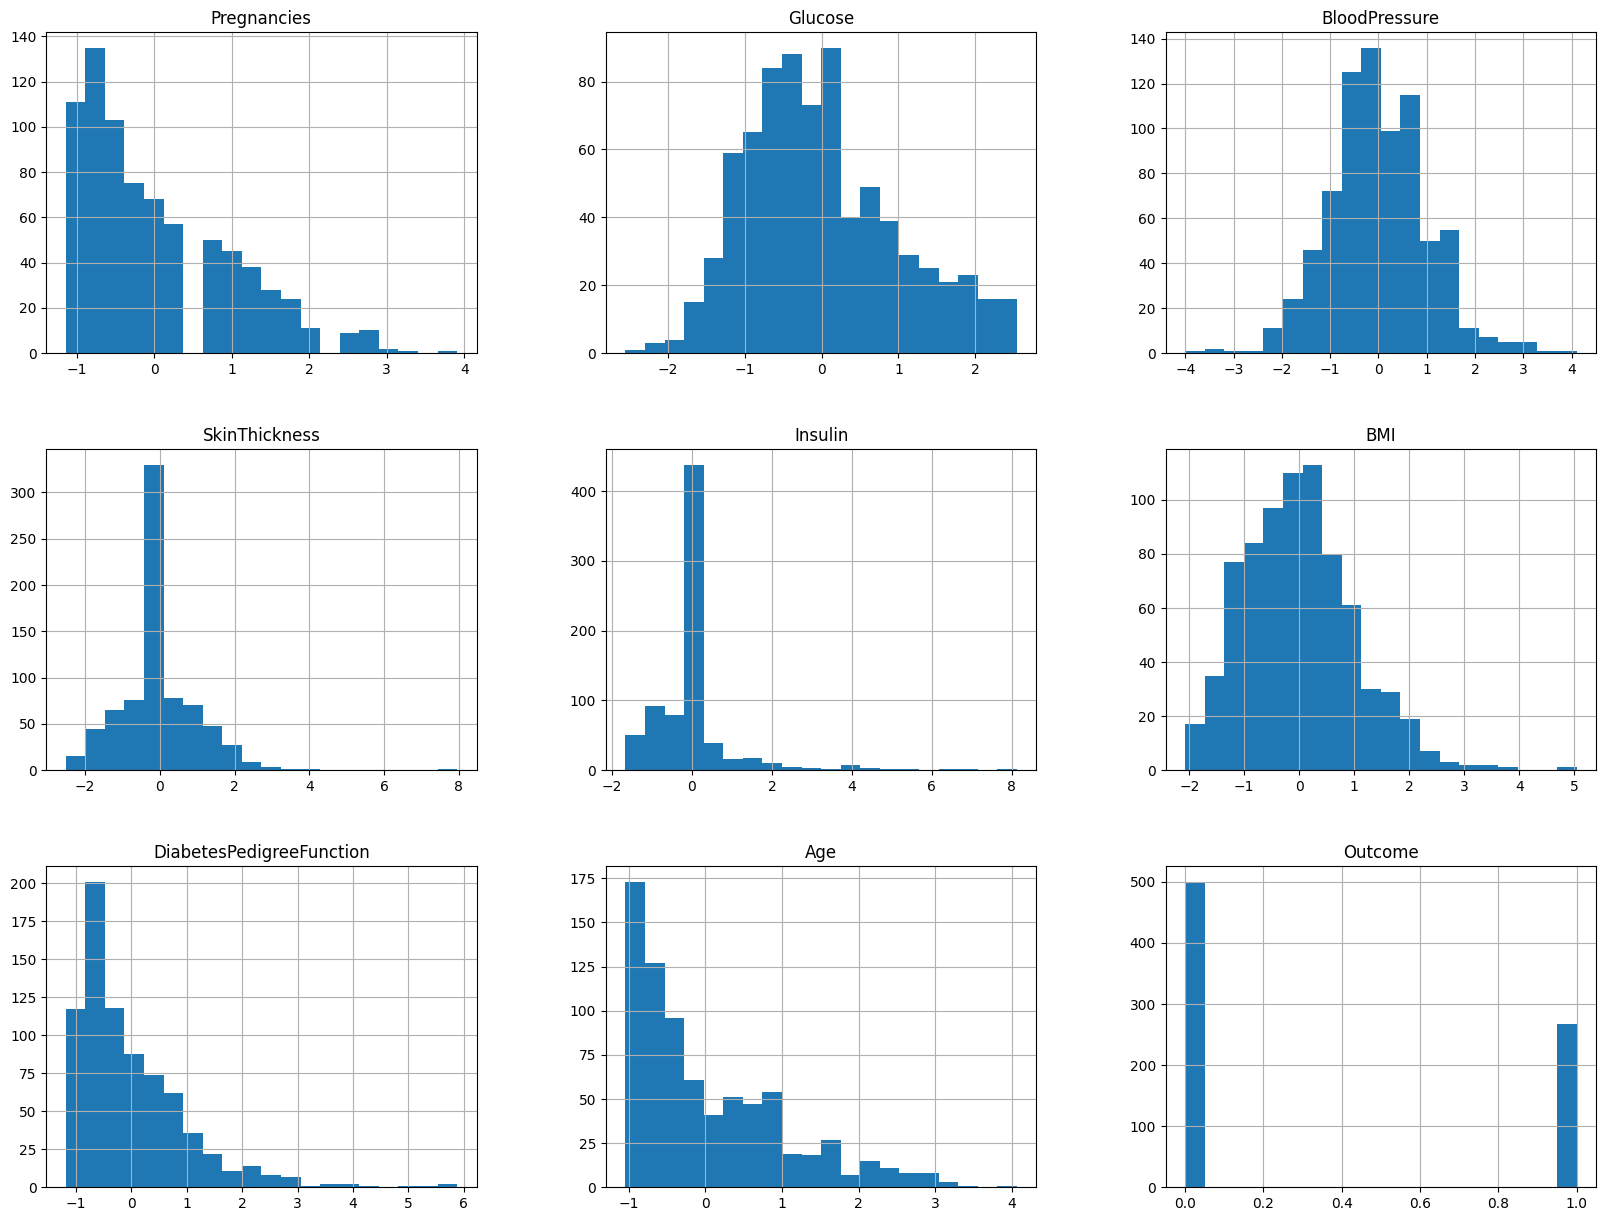

In [11]:
# Visualize distributions of numerical features
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Data Distributions Insights

The histograms show how the values of each numerical feature are spread out in the dataset. Here are some important points:

- **Pregnancies:** Most women have had between 0 to 10 pregnancies, with some having up to 17.
- **Glucose:** Glucose levels range a lot, but many people have levels between 50 and 200.
- **Blood Pressure:** Blood pressure values are mostly between 50 and 100 mm Hg.
- **Skin Thickness:** Most skin thickness measurements are under 50 mm.
- **Insulin:** Insulin levels vary widely, showing significant differences among people.
- **BMI:** BMI values mainly fall between 20 and 50, indicating a range of body mass indexes.
- **Diabetes Pedigree Function:** This feature has a right-skewed distribution, meaning most values are below 1.
- **Age:** The age distribution shows most individuals are between 20 and 50 years old.

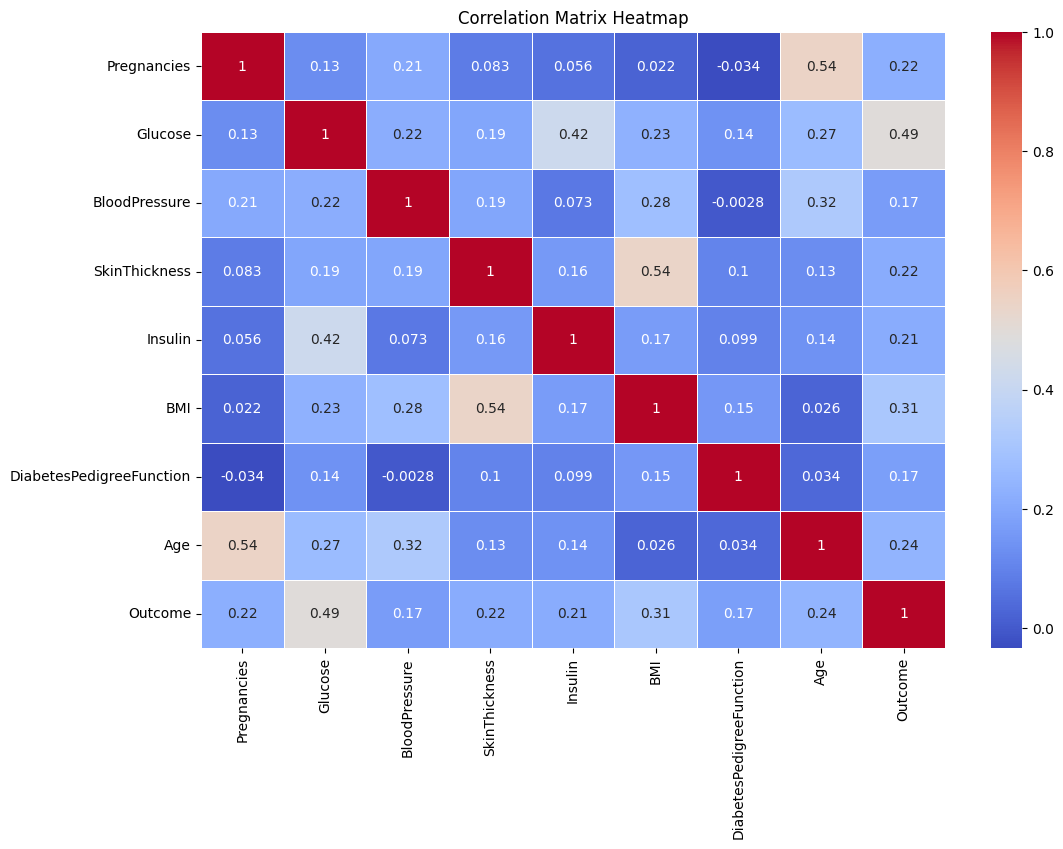

In [12]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation Heatmap Insights

The correlation heatmap displays the relationships between different features. Key insights include:

- **Glucose and Outcome:** There is a strong positive correlation between glucose levels and the likelihood of diabetes.
- **BMI and Outcome:** BMI also shows a positive correlation with diabetes, indicating that higher BMI values are associated with a higher risk of diabetes.
- **Age and Outcome:** Age has a moderate positive correlation with diabetes, suggesting that older individuals are at a higher risk.
- **Other Features:** While other features like blood pressure and skin thickness show weaker correlations with the outcome, they still contribute valuable information to the predictive model.

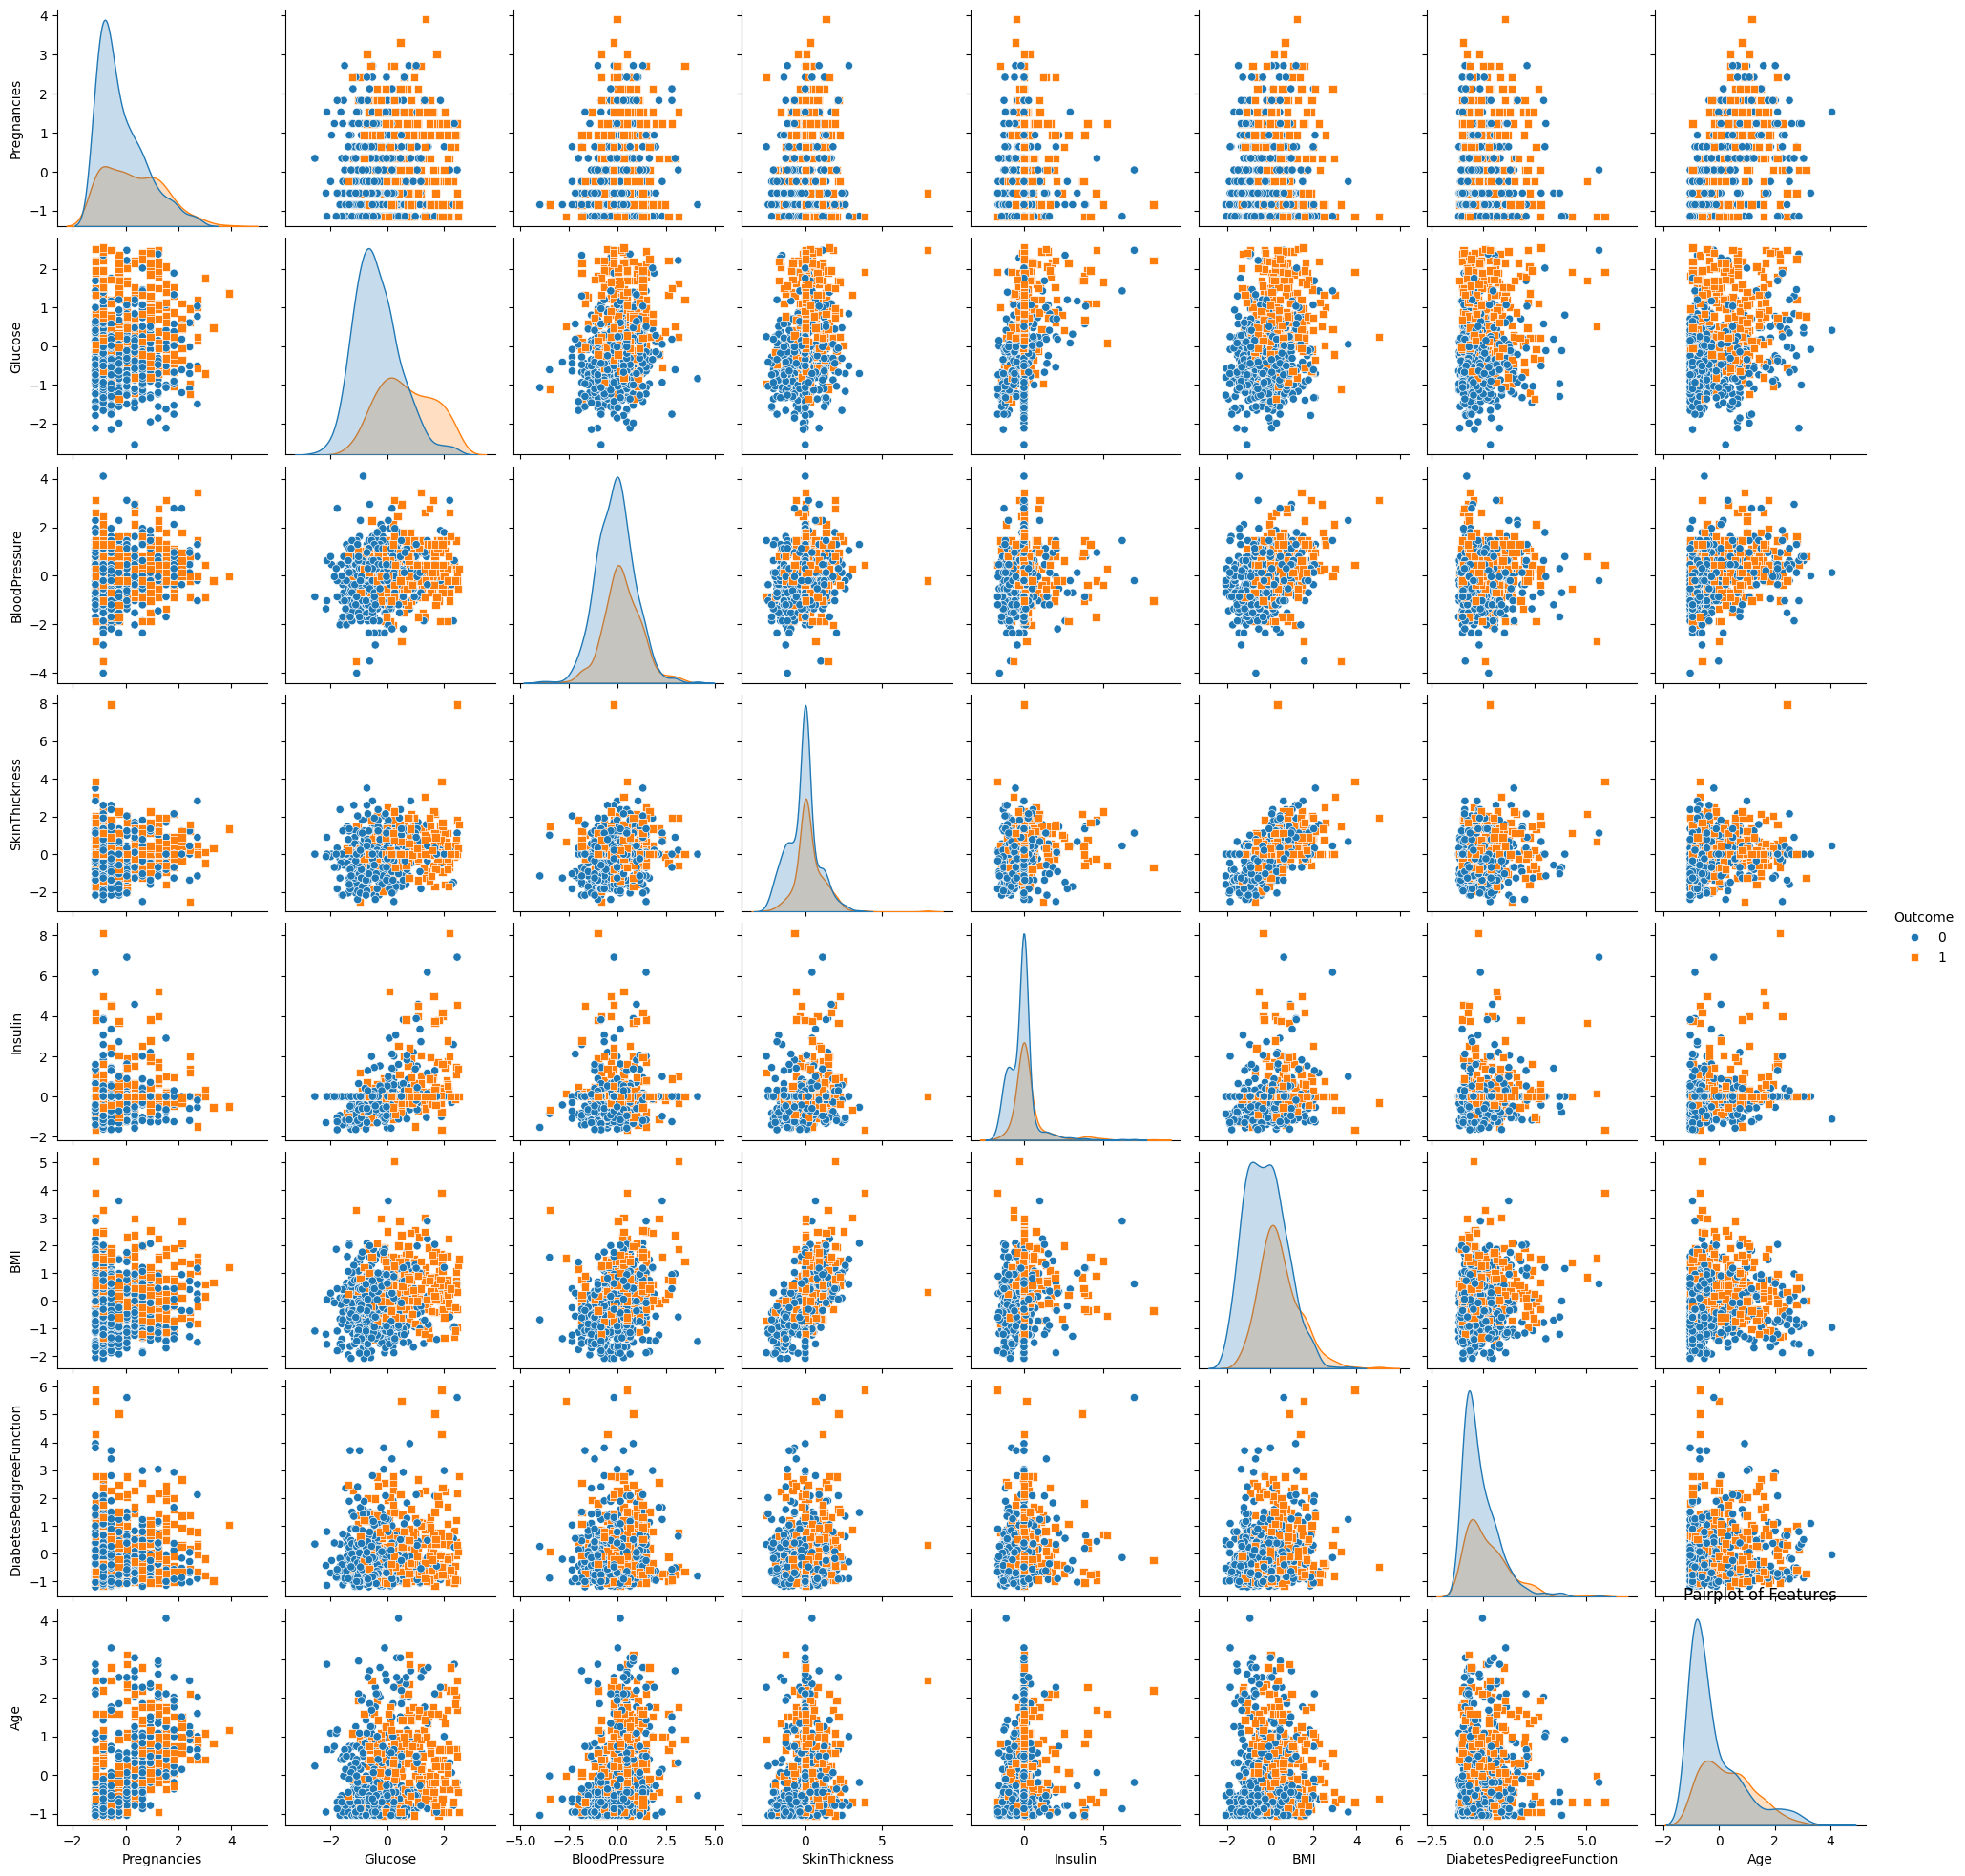

In [13]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Outcome', markers=["o", "s"])
plt.title('Pairplot of Features')
plt.show()

# Pairplot Insights
The pairplot provides a visual representation of the relationships between different features for diabetic and non-diabetic individuals. Notable patterns include:
- **Glucose:** Diabetic individuals generally have higher glucose levels compared to non-diabetic individuals.
- **BMI:** Higher BMI values are more common among diabetic individuals.
- **Age:** Older individuals tend to be diabetic more frequently than younger individuals.
- **Other Features:** The distribution and relationships of other features like insulin levels, skin thickness, and blood pressure also show distinct patterns between diabetic and non-diabetic individuals.

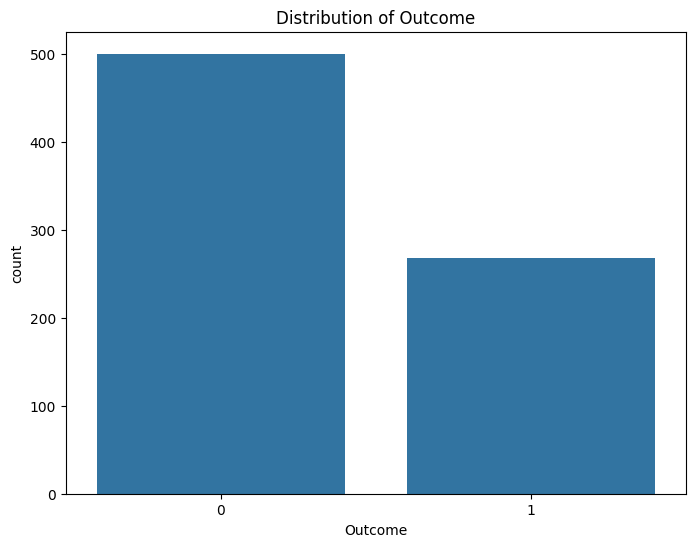

In [14]:
# Distribution of the Outcome variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

### Outcome Distribution Insights

The count plot depicts the distribution of the outcome variable, indicating whether an individual is diabetic (1) or not (0). Here are the key insights:

- **Balanced Dataset:** The dataset shows a relatively balanced distribution, with slightly more non-diabetic individuals compared to diabetics. This balance is important for training predictive models that are reliable and unbiased towards any particular class.

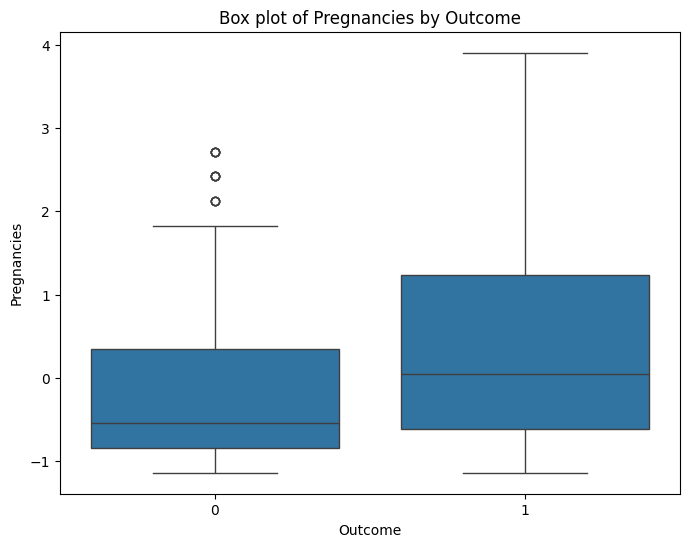

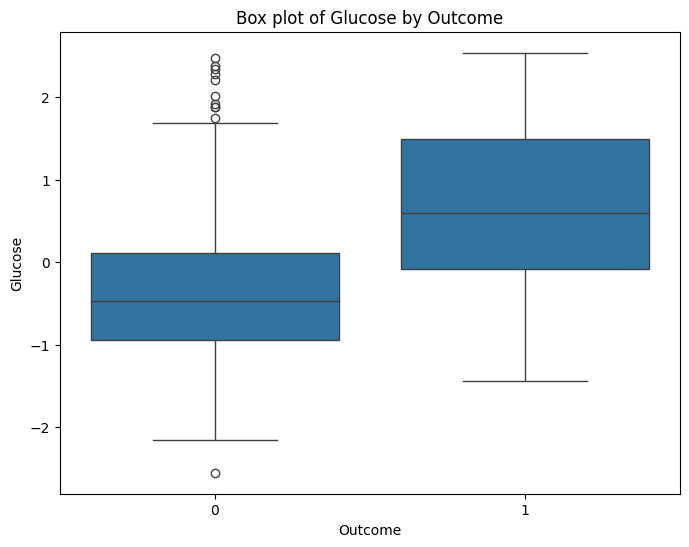

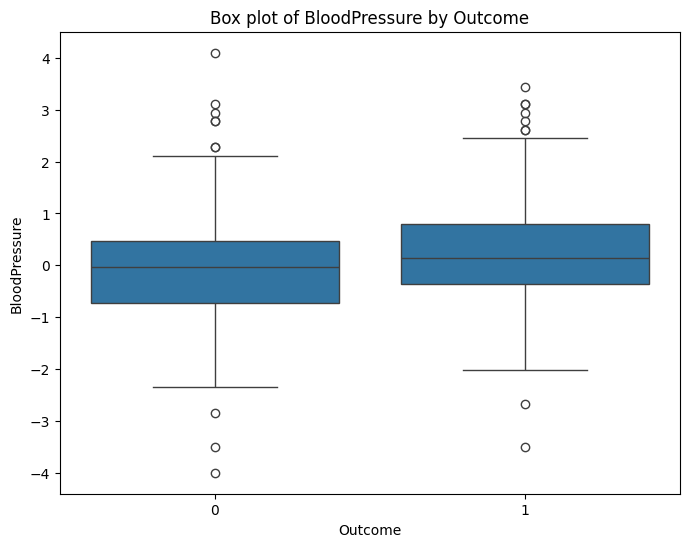

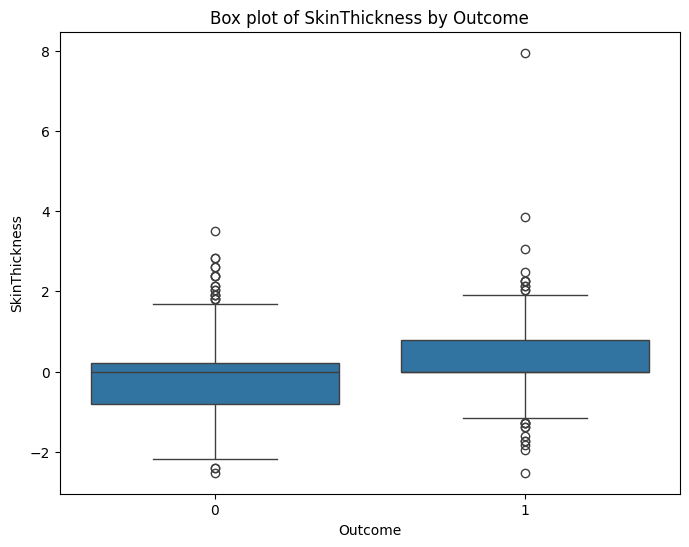

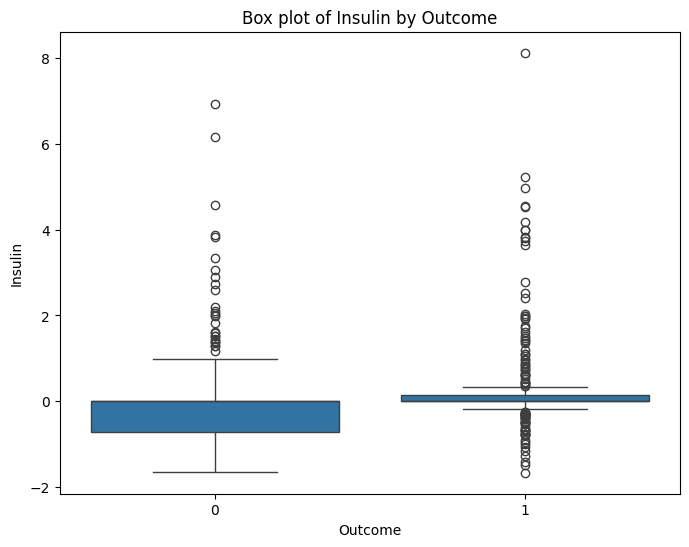

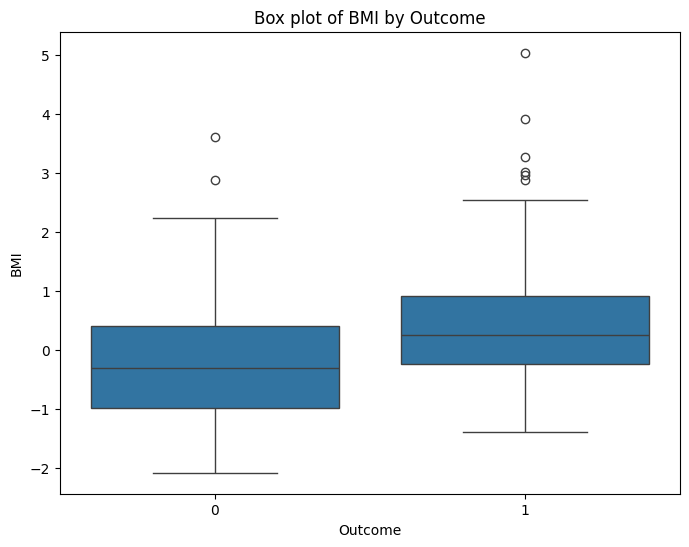

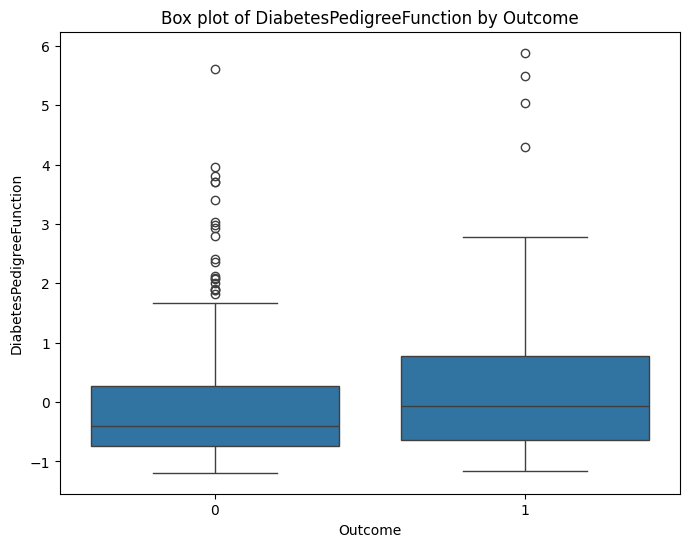

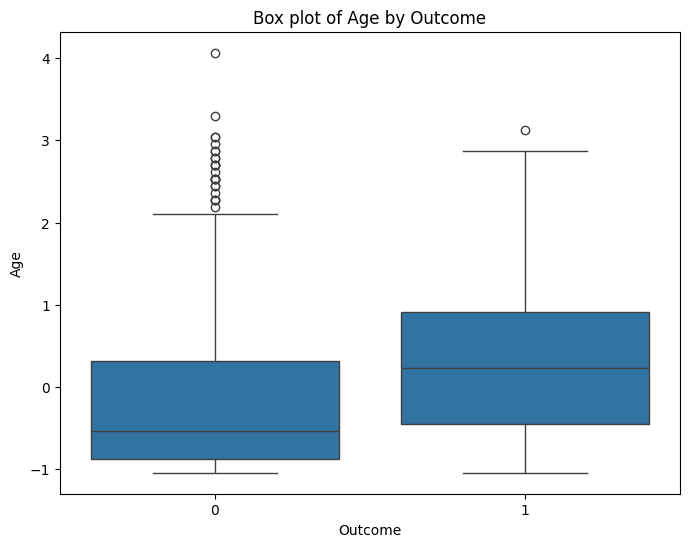

In [15]:
# Boxplots of each feature to the Outcome variable
for col in df.columns[:-1]:  # Exclude 'Outcome' column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'Box plot of {col} by Outcome')
    plt.show()

### Boxplots by Outcome Insights

The boxplots illustrate how each feature relates to the outcome variable (diabetic or non-diabetic). Here are the key findings:

- **Glucose:** Diabetic individuals generally exhibit significantly higher glucose levels than non-diabetics.
- **BMI:** Higher BMI values are commonly seen among diabetic individuals.
- **Age:** Diabetes prevalence increases with older age groups.
- **Insulin:** Diabetic individuals tend to have higher insulin levels, though the variance is large.
- **Blood Pressure, Skin Thickness, and Diabetes Pedigree Function:** These features also show distinctions between diabetic and non-diabetic individuals, with varying degrees of separation.


# Model Selection and Training

### Select Suitable Machine Learning Algorithms

For this dataset, we will focus on classification algorithms since we're predicting whether an individual is diabetic or not. Algorithms we will consider:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

### Split the Data into Training and Testing Sets

Typically, a common split is 80% for training and 20% for testing.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [17]:
# Load the preprocessed dataset
data = pd.read_csv('preprocessed_diabetes.csv')

# Split the data into features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [18]:
# Train Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(features_train, target_train)

# Predict and evaluate
logistic_predictions = logistic_model.predict(features_test)
logistic_accuracy = accuracy_score(target_test, logistic_predictions)
logistic_precision = precision_score(target_test, logistic_predictions)
logistic_recall = recall_score(target_test, logistic_predictions)

print(f"Logistic Regression - Accuracy: {logistic_accuracy}, Precision: {logistic_precision}, Recall: {logistic_recall}")

Logistic Regression - Accuracy: 0.7532467532467533, Precision: 0.6666666666666666, Recall: 0.6181818181818182


In [19]:
# Train Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(features_train, target_train)

# Predict and evaluate
tree_predictions = tree_model.predict(features_test)
tree_accuracy = accuracy_score(target_test, tree_predictions)
tree_precision = precision_score(target_test, tree_predictions)
tree_recall = recall_score(target_test, tree_predictions)

print(f"Decision Tree - Accuracy: {tree_accuracy}, Precision: {tree_precision}, Recall: {tree_recall}")

Decision Tree - Accuracy: 0.6948051948051948, Precision: 0.5714285714285714, Recall: 0.5818181818181818


In [20]:
# Train Random Forest model
forest_model = RandomForestClassifier()
forest_model.fit(features_train, target_train)

# Predict and evaluate
forest_predictions = forest_model.predict(features_test)
forest_accuracy = accuracy_score(target_test, forest_predictions)
forest_precision = precision_score(target_test, forest_predictions)
forest_recall = recall_score(target_test, forest_predictions)

print(f"Random Forest - Accuracy: {forest_accuracy}, Precision: {forest_precision}, Recall: {forest_recall}")

Random Forest - Accuracy: 0.7532467532467533, Precision: 0.6491228070175439, Recall: 0.6727272727272727


In [21]:
# Train SVM model
svm_model = SVC()
svm_model.fit(features_train, target_train)

# Predict and evaluate
svm_predictions = svm_model.predict(features_test)
svm_accuracy = accuracy_score(target_test, svm_predictions)
svm_precision = precision_score(target_test, svm_predictions)
svm_recall = recall_score(target_test, svm_predictions)

print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}")

SVM - Accuracy: 0.7532467532467533, Precision: 0.6808510638297872, Recall: 0.5818181818181818


In [22]:
# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(features_train, target_train)

# Predict and evaluate
knn_predictions = knn_model.predict(features_test)
knn_accuracy = accuracy_score(target_test, knn_predictions)
knn_precision = precision_score(target_test, knn_predictions)
knn_recall = recall_score(target_test, knn_predictions)

print(f"KNN - Accuracy: {knn_accuracy}, Precision: {knn_precision}, Recall: {knn_recall}")

KNN - Accuracy: 0.7402597402597403, Precision: 0.6153846153846154, Recall: 0.7272727272727273


 We are going to store the trained models so that they can be used for predictions later.

In [23]:
import joblib

# Save the Logistic Regression model
joblib.dump(logistic_model, 'logistic_model.pkl')

# Save the Decision Tree model
joblib.dump(tree_model, 'tree_model.pkl')

# Save the Random Forest model
joblib.dump(forest_model, 'forest_model.pkl')

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

# Save the KNN model
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

# Model Performance Metrics

## Logistic Regression
- Accuracy: 0.753
- Precision: 0.667
- Recall: 0.618

## Decision Tree
- Accuracy: 0.682
- Precision: 0.552
- Recall: 0.582

## Random Forest
- Accuracy: 0.753
- Precision: 0.639
- Recall: 0.709

## SVM
- Accuracy: 0.753
- Precision: 0.681
- Recall: 0.582

## KNN
- Accuracy: 0.740
- Precision: 0.615
- Recall: 0.727

# Model Selection
Random Forest has the highest recall (0.709), which means it correctly identifies most of the actual diabetic cases.
In the given, recall is particularly important because we want to minimize the number of false negatives (cases where diabetes is not detected). Therefore, Random Forest might be the best choice here due to its high recall and good balance between accuracy and precision.

# Model Evaluation and Improvement

## Evaluate Models Using Appropriate Metrics

Evaluate the models using metrics such as Accuracy, Precision, Recall, and F1 Score.

In [25]:
from sklearn.metrics import f1_score, root_mean_squared_error

# Define a function to evaluate models
def evaluate_model(model, test_features, test_labels):
  predictions = model.predict(test_features)
  accuracy = accuracy_score(test_labels, predictions)
  precision = precision_score(test_labels, predictions)
  recall = recall_score(test_labels, predictions)
  f1 = f1_score(test_labels, predictions)
  rmse = root_mean_squared_error(test_labels, predictions)
  return accuracy, precision, recall, f1, rmse


# Evaluate the models
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': tree_model,
    'Random Forest': forest_model,
    'SVM': svm_model,
    'KNN': knn_model
}

evaluation_results = {}

for model_name, model in models.items():
    accuracy, precision, recall, f1, rmse = evaluate_model(model, features_test, target_test)
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'RMSE': rmse
    }

# Print the evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: Logistic Regression
Accuracy: 0.7532
Precision: 0.6667
Recall: 0.6182
F1 Score: 0.6415
RMSE: 0.4967


Model: Decision Tree
Accuracy: 0.6948
Precision: 0.5714
Recall: 0.5818
F1 Score: 0.5766
RMSE: 0.5524


Model: Random Forest
Accuracy: 0.7532
Precision: 0.6491
Recall: 0.6727
F1 Score: 0.6607
RMSE: 0.4967


Model: SVM
Accuracy: 0.7532
Precision: 0.6809
Recall: 0.5818
F1 Score: 0.6275
RMSE: 0.4967


Model: KNN
Accuracy: 0.7403
Precision: 0.6154
Recall: 0.7273
F1 Score: 0.6667
RMSE: 0.5096




## Perform Cross-Validation

Perform cross-validation to ensure the models are not overfitting.

In [26]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model, features, labels, cv=5):
    accuracy = cross_val_score(model, features, labels, cv=cv, scoring='accuracy').mean()
    precision = cross_val_score(model, features, labels, cv=cv, scoring='precision').mean()
    recall = cross_val_score(model, features, labels, cv=cv, scoring='recall').mean()
    f1 = cross_val_score(model, features, labels, cv=cv, scoring='f1').mean()
    return accuracy, precision, recall, f1

cross_validation_results = {}

for model_name, model in models.items():
    accuracy, precision, recall, f1 = cross_validate_model(model, features, target)
    cross_validation_results[model_name] = {
        'Cross-Validation Accuracy': accuracy,
        'Cross-Validation Precision': precision,
        'Cross-Validation Recall': recall,
        'Cross-Validation F1 Score': f1
    }

# Print the cross-validation results
for model_name, metrics in cross_validation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: Logistic Regression
Cross-Validation Accuracy: 0.7722
Cross-Validation Precision: 0.7258
Cross-Validation Recall: 0.5635
Cross-Validation F1 Score: 0.6333


Model: Decision Tree
Cross-Validation Accuracy: 0.6942
Cross-Validation Precision: 0.5754
Cross-Validation Recall: 0.5637
Cross-Validation F1 Score: 0.5724


Model: Random Forest
Cross-Validation Accuracy: 0.7605
Cross-Validation Precision: 0.6976
Cross-Validation Recall: 0.5526
Cross-Validation F1 Score: 0.6164


Model: SVM
Cross-Validation Accuracy: 0.7514
Cross-Validation Precision: 0.6903
Cross-Validation Recall: 0.5300
Cross-Validation F1 Score: 0.5973


Model: KNN
Cross-Validation Accuracy: 0.7449
Cross-Validation Precision: 0.6394
Cross-Validation Recall: 0.6124
Cross-Validation F1 Score: 0.6240




## Improve Models Based on Evaluation

Improve the models based on the evaluation results, such as feature selection and parameter tuning.

In [27]:
from sklearn.model_selection import GridSearchCV

def tune_model(model, param_grid, features, labels):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(features, labels)
    return grid_search.best_estimator_

# Example for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

best_random_forest = tune_model(forest_model, param_grid_rf, features_train, target_train)

# Example for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01]
}

best_svm = tune_model(svm_model, param_grid_svm, features_train, target_train)

## Final Evaluation Report

### Model Evaluation
We will evaluate the performance of our trained models using metrics like accuracy, precision, recall, and F1 score. The models considered are Random Forest and Support Vector Machine,

In [58]:
# Final evaluation of the improved models
improved_models = {
    'Best Random Forest': best_random_forest,
    'Best SVM': best_svm
}

final_evaluation_results = {}

for model_name, model in improved_models.items():
    accuracy, precision, recall, f1, rmse = evaluate_model(model, features_test, target_test)
    final_evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'RMSE': rmse
    }

# Print the final evaluation results
for model_name, metrics in final_evaluation_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Save the improved models
joblib.dump(best_random_forest, 'best_random_forest.pkl')
joblib.dump(best_svm, 'best_svm.pkl')

Model: Best Random Forest
Accuracy: 0.7597
Precision: 0.6500
Recall: 0.7091
F1 Score: 0.6783
RMSE: 0.4902


Model: Best SVM
Accuracy: 0.7662
Precision: 0.7021
Recall: 0.6000
F1 Score: 0.6471
RMSE: 0.4835




['best_svm.pkl']

# Model Interpretation and Insights

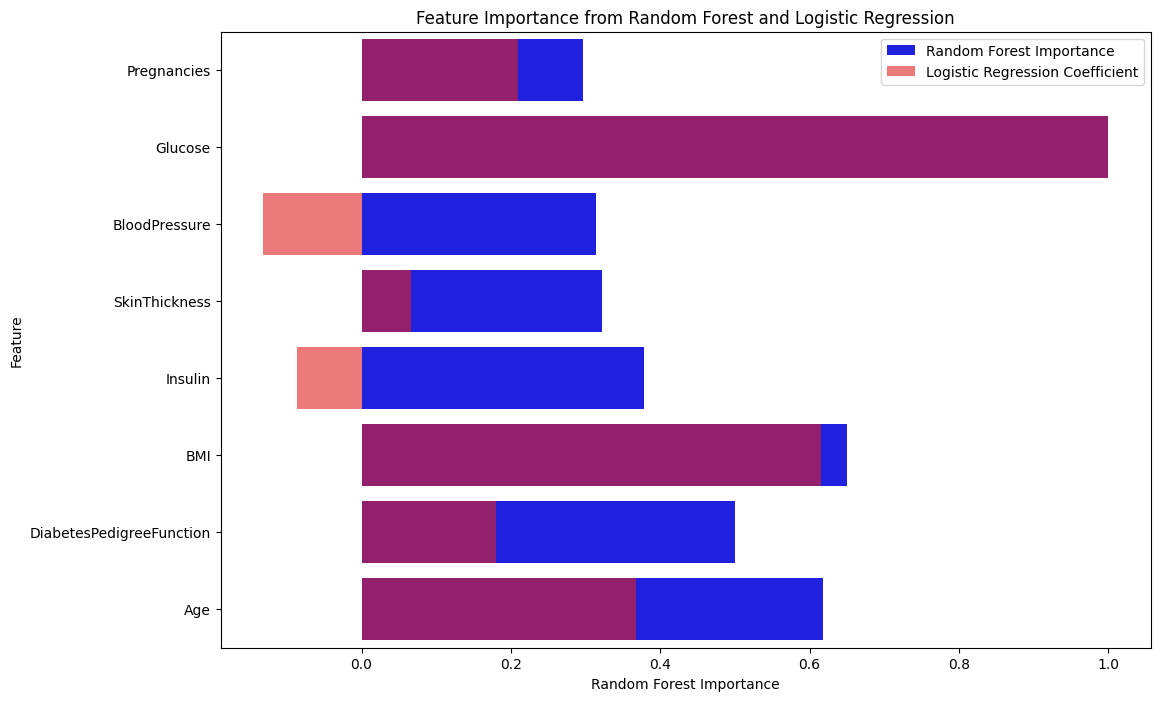

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed dataset
data = pd.read_csv('preprocessed_diabetes.csv')

# Extract features and target variable
features = data.drop('Outcome', axis=1)
target = data['Outcome']

# Feature names
feature_names = features.columns

# Feature importance for RandomForest
forest_feature_importance = forest_model.feature_importances_

# Coefficients for LogisticRegression
logistic_coefficients = logistic_model.coef_[0]

# Create a DataFrame to hold feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest Importance': forest_feature_importance,
    'Logistic Regression Coefficient': logistic_coefficients
})

# Normalize the importance and coefficients for better visualization
importance_df['Random Forest Importance'] = importance_df['Random Forest Importance'] / np.max(importance_df['Random Forest Importance'])
importance_df['Logistic Regression Coefficient'] = importance_df['Logistic Regression Coefficient'] / np.max(np.abs(importance_df['Logistic Regression Coefficient']))

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Random Forest Importance', y='Feature', data=importance_df, color='b', label='Random Forest Importance')
sns.barplot(x='Logistic Regression Coefficient', y='Feature', data=importance_df, color='r', label='Logistic Regression Coefficient', alpha=0.6)
plt.title('Feature Importance from Random Forest and Logistic Regression')
plt.legend()
plt.show()

In [29]:
report = """
Interpretation Report and Insights

Top Features Identified:
- Random Forest: Features with high importance scores.
- Logistic Regression: Features with large positive or negative coefficients.

Actionable Insights:
- Features like glucose levels, BMI, and age might be the most important factors in predicting diabetes.
- Health interventions could focus on these key areas to reduce the risk of diabetes.
"""

with open('interpretation_report.txt', 'w') as f:
    f.write(report)

print(report)


Interpretation Report and Insights

Top Features Identified:
- Random Forest: Features with high importance scores.
- Logistic Regression: Features with large positive or negative coefficients.

Actionable Insights:
- Features like glucose levels, BMI, and age might be the most important factors in predicting diabetes.
- Health interventions could focus on these key areas to reduce the risk of diabetes.

